<a href="https://colab.research.google.com/github/muhammadhafiz27/Heart-Disease-Predictions/blob/main/Praktikum_BigData_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library dan Load Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/muhammadhafiz27/Heart-Disease-Predictions/refs/heads/main/heart_clean.csv")
display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# **Visualisasi Distribusi Fitur Numerik**

**Usia**

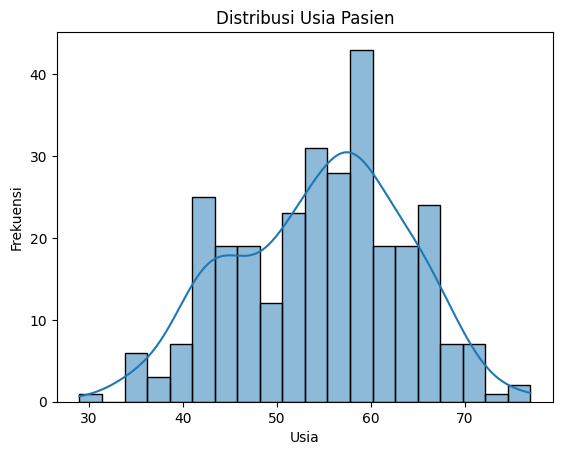

In [3]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Distribusi Usia Pasien")
plt.xlabel("Usia")
plt.ylabel("Frekuensi")
plt.show()

**Boxplot Kolesterol (chol):**

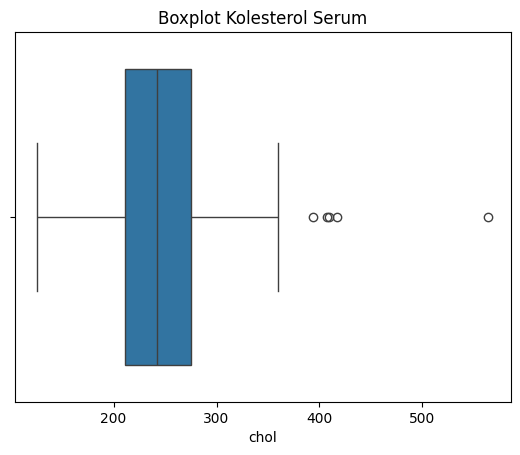

In [4]:
sns.boxplot(x=df['chol'])
plt.title("Boxplot Kolesterol Serum")
plt.show()

# **Visualisasi Distribusi Fitur Kategorikal**

**Sex dan target**

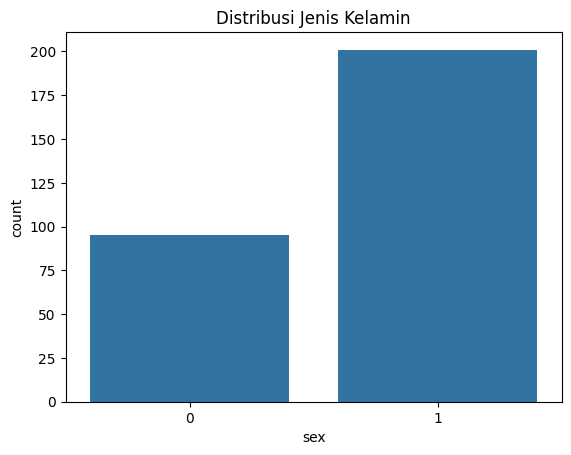

In [5]:
sns.countplot(x='sex', data=df)
plt.title("Distribusi Jenis Kelamin")
plt.show()

**Distribusi Target**

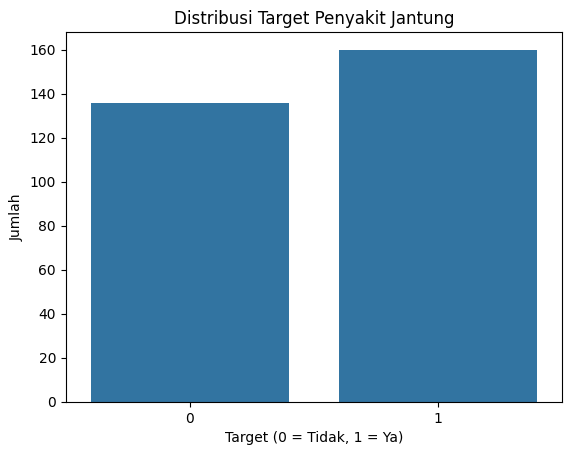

In [7]:
sns.countplot(x="target", data=df)
plt.title("Distribusi Target Penyakit Jantung")
plt.xlabel("Target (0 = Tidak, 1 = Ya)")
plt.ylabel("Jumlah")
plt.show()

# **Korelasi antar Variabel Numerik**

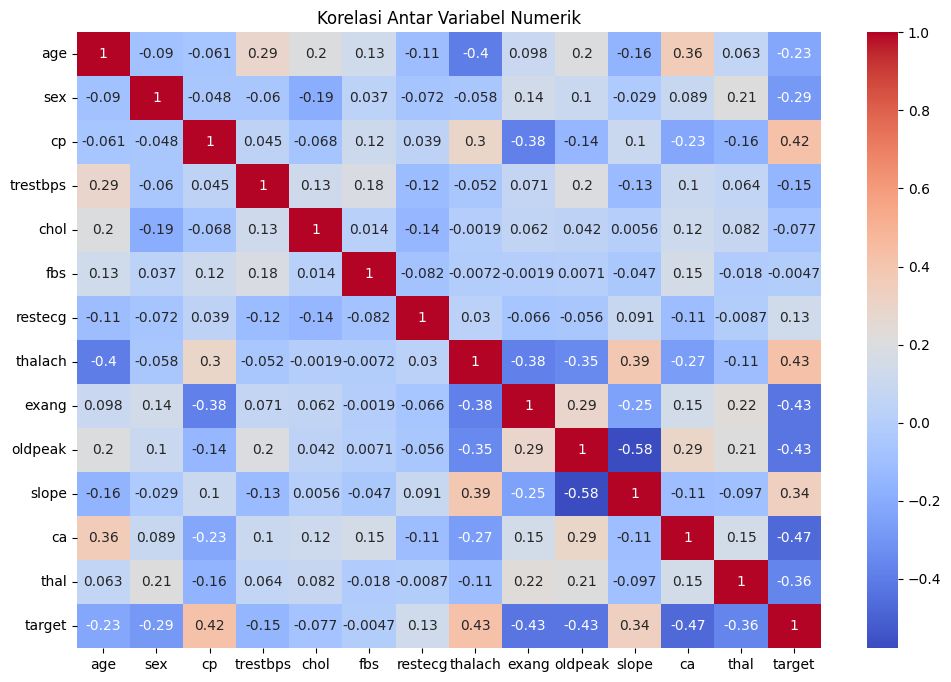

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Variabel Numerik")
plt.show()

# **Latihan 1 : Distribusi Fitur Numerik**

## **Buat Histogram distribusi trestbps(tekanan darah)**

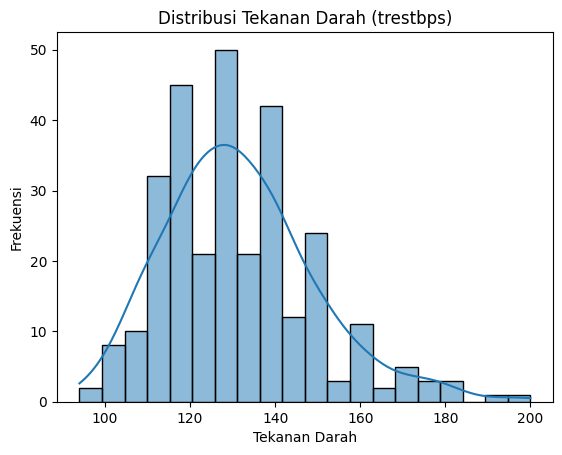

In [9]:
sns.histplot(df['trestbps'], bins=20, kde=True)
plt.title("Distribusi Tekanan Darah (trestbps)")
plt.xlabel("Tekanan Darah")
plt.ylabel("Frekuensi")
plt.show()

Dari histogram trestbps, kita bisa melihat sebaran tekanan darah pada pasien. Umumnya, distribusinya cenderung normal atau sedikit miring ke kanan. Puncak distribusi menunjukkan nilai tekanan darah yang paling sering ditemui. Adanya ekor di sebelah kanan menunjukkan ada beberapa pasien dengan tekanan darah yang lebih tinggi.

**Insight:** Mengetahui distribusi tekanan darah ini penting karena tekanan darah adalah salah satu faktor risiko utama penyakit jantung. Kita dapat melihat rentang tekanan darah pada sebagian besar pasien dalam dataset ini.

## **Buat Boxplot untuk Oldpeak**

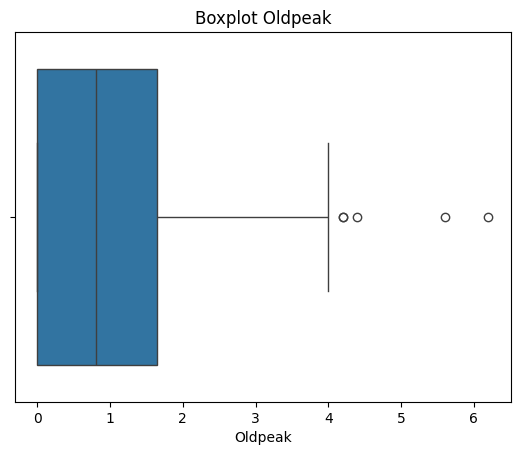

In [10]:
sns.boxplot(x=df['oldpeak'])
plt.title("Boxplot Oldpeak")
plt.xlabel("Oldpeak")
plt.show()

Boxplot oldpeak memberikan ringkasan statistik (median, kuartil, rentang interkuartil) dan menunjukkan adanya outlier (nilai-nilai yang jauh dari sebagian besar data).

**Insight:** oldpeak berkaitan dengan penurunan segmen ST saat olahraga, yang bisa menjadi indikator iskemia jantung. Boxplot ini membantu kita memahami seberapa bervariasi nilai oldpeak pada pasien, nilai tengahnya, dan apakah ada pasien dengan nilai oldpeak yang sangat tinggi (potensi outlier) yang mungkin perlu perhatian lebih lanjut.

# **Latihan 2 : Distribusi Fitur Kategorikal**

## **Buat countplot untuk cp (chest pain type)**

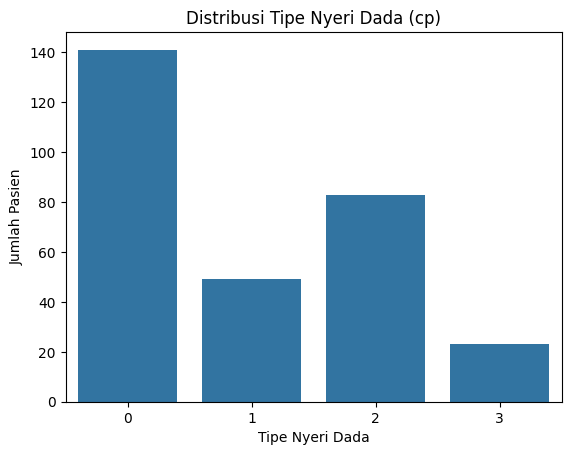

In [11]:
sns.countplot(x='cp', data=df)
plt.title("Distribusi Tipe Nyeri Dada (cp)")
plt.xlabel("Tipe Nyeri Dada")
plt.ylabel("Jumlah Pasien")
plt.show()

Grafik ini menunjukkan jumlah pasien untuk setiap kategori tipe nyeri dada. Setiap bar mewakili satu jenis nyeri dada (nilai 0, 1, 2, 3), dan tingginya menunjukkan berapa banyak pasien yang memiliki tipe nyeri dada tersebut.


**Insight:** Dari countplot ini, kita bisa melihat sebaran pasien berdasarkan tipe nyeri dada yang mereka alami. Ini penting karena tipe nyeri dada (seperti angina tipikal, angina atipikal, non-anginal pain, atau asymptomatic) adalah indikator penting dari kondisi jantung. Dengan melihat jumlah pasien di setiap kategori, kita bisa mengetahui tipe nyeri dada mana yang paling umum dalam dataset ini dan bagaimana distribusinya.

## **Buat pie chart untuk thal**

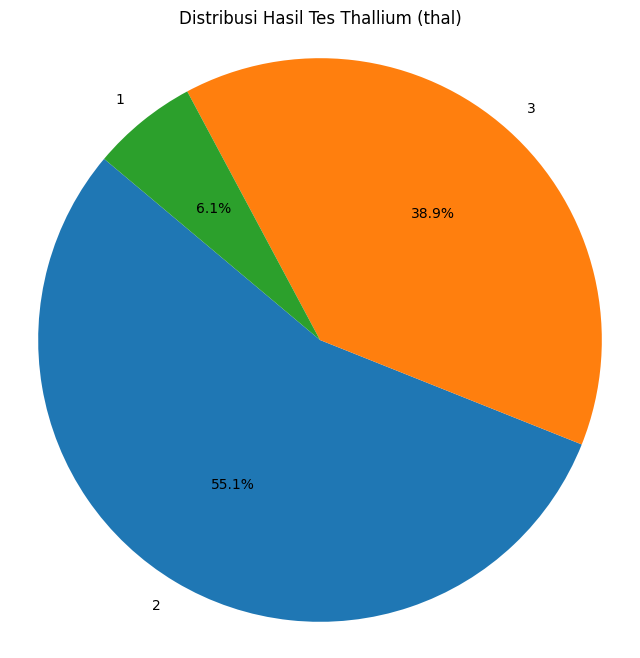

In [13]:
thal_counts = df['thal'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(thal_counts, labels=thal_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribusi Hasil Tes Thallium (thal)")
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Grafik ini menunjukkan proporsi pasien dalam setiap kategori hasil tes thallium. Setiap irisan pai mewakili satu kategori (nilai 1, 2, 3), dan ukurannya menunjukkan persentase pasien yang termasuk dalam kategori tersebut.

**Insight:** Dari pie chart ini, kita bisa melihat sebaran pasien berdasarkan hasil tes thallium. Tes thallium adalah tes pencitraan nuklir yang digunakan untuk mengevaluasi aliran darah ke jantung. Kategori-kategori pada 'thal' biasanya memiliki makna klinis terkait dengan kondisi jantung. Dengan melihat persentase di setiap kategori, kita bisa mengetahui hasil tes thallium mana yang paling umum dalam dataset ini dan bagaimana distribusinya secara proporsional.

# **Latihan 3 : Korelasi**

## **Hitung korelasi antara age dan thalach**

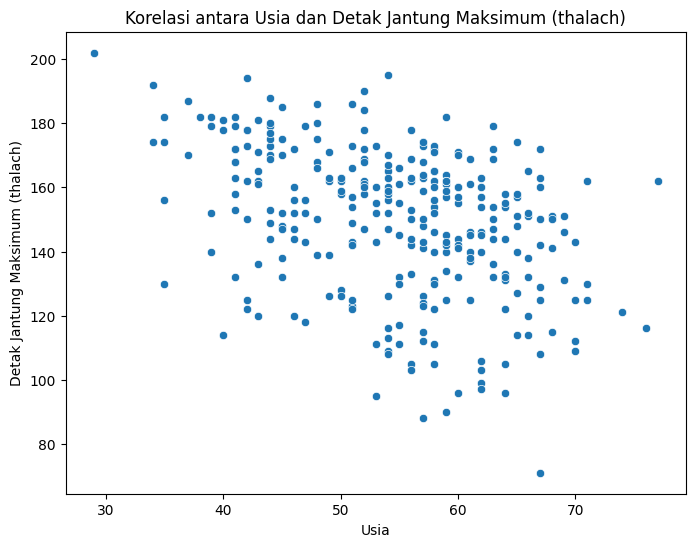

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='thalach', data=df)
plt.title('Korelasi antara Usia dan Detak Jantung Maksimum (thalach)')
plt.xlabel('Usia')
plt.ylabel('Detak Jantung Maksimum (thalach)')
plt.show()

In [18]:
correlation_age_thalach = df['age'].corr(df['thalach'])
print(f"Korelasi antara age dan thalach: {correlation_age_thalach:.2f}")

Korelasi antara age dan thalach: -0.40


Korelasi antara 'age' (usia) dan 'thalach' (detak jantung maksimum) adalah sekitar -0.40. Ini adalah korelasi negatif moderat. Artinya, seiring bertambahnya usia seseorang, detak jantung maksimum yang dapat mereka capai cenderung menurun. Ini adalah temuan yang umum dalam fisiologi manusia.

## **Buat heatmap hanya untuk kolom numerik : ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']**

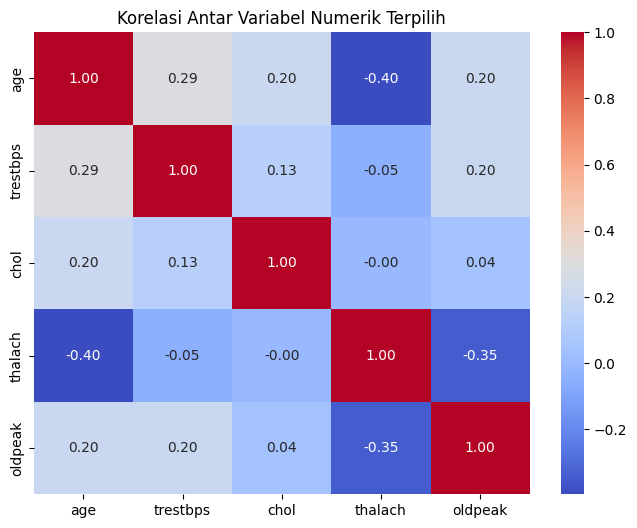

In [19]:
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Variabel Numerik Terpilih")
plt.show()

Heatmap ini menampilkan matriks korelasi antara variabel 'age', 'trestbps', 'chol', 'thalach', dan 'oldpeak'. Setiap sel dalam heatmap menunjukkan koefisien korelasi antara dua variabel. Warna yang lebih hangat (seperti merah) menunjukkan korelasi positif yang lebih kuat, sementara warna yang lebih dingin (seperti biru) menunjukkan korelasi negatif yang lebih kuat. Angka di setiap sel adalah nilai koefisien korelasi (antara -1 dan +1).

**Insight:** Dengan melihat heatmap ini, kita dapat dengan cepat mengidentifikasi pasangan variabel yang memiliki korelasi kuat.

1. Korelasi Negatif: Perhatikan sel yang menunjukkan korelasi antara 'age' dan 'thalach'. Nilainya sekitar -0.40, yang menunjukkan korelasi negatif moderat. Ini berarti seiring bertambahnya usia, detak jantung maksimum cenderung menurun.
2. Korelasi Positif: Cari nilai korelasi positif yang lebih tinggi untuk melihat variabel mana yang cenderung meningkat bersamaan. Misalnya, mungkin ada korelasi positif antara 'oldpeak' dan 'trestbps', meskipun korelasinya mungkin tidak terlalu kuat.
3. Korelasi Lemah: Nilai korelasi yang mendekati nol menunjukkan hubungan linier yang lemah antar variabel.

# **Latihan 4 : Insight**

1. Distribusi Tekanan Darah (trestbps):

Insight: Distribusi tekanan darah cenderung normal atau sedikit miring ke kanan, menunjukkan bahwa sebagian besar pasien memiliki tekanan darah dalam rentang umum, namun ada beberapa dengan tekanan darah yang lebih tinggi. Tekanan darah adalah faktor risiko utama penyakit jantung.

---

2. Distribusi Kolesterol Serum (chol):

Insight: Boxplot kolesterol menunjukkan sebaran nilai kolesterol, nilai tengah (median), dan adanya outlier (nilai kolesterol yang sangat tinggi) yang mungkin perlu diperhatikan lebih lanjut.

---

3. Distribusi Oldpeak:

Insight: Boxplot oldpeak memberikan ringkasan statistik dan menunjukkan variasi nilai oldpeak, yang merupakan indikator iskemia jantung. Adanya outlier oldpeak juga teridentifikasi.

---

4. Distribusi Jenis Kelamin (sex):

Insight: Countplot menunjukkan proporsi pasien laki-laki dan perempuan dalam dataset. Ini penting untuk memahami komposisi gender dalam studi penyakit jantung ini.

---

5. Distribusi Tipe Nyeri Dada (cp):

Insight: Countplot tipe nyeri dada menunjukkan sebaran pasien berdasarkan jenis nyeri dada yang mereka alami (angina tipikal, atipikal, dll.). Tipe nyeri dada adalah indikator penting dari kondisi jantung.

---

6. Distribusi Hasil Tes Thallium (thal):

Insight: Pie chart hasil tes thallium menunjukkan proporsi pasien dalam setiap kategori hasil tes pencitraan aliran darah ke jantung. Ini membantu memahami sebaran keparahan atau jenis masalah aliran darah.

---

7. Korelasi antara Usia (age) dan Detak Jantung Maksimum (thalach):

Insight: Terdapat korelasi negatif moderat (-0.40) antara usia dan thalach. Ini berarti semakin tua usia seseorang, semakin rendah detak jantung maksimum yang bisa dicapai. Ini adalah temuan fisiologis yang umum.

---

8. Heatmap Korelasi Variabel Numerik Terpilih:

Insight: Heatmap ini menunjukkan matriks korelasi antara 'age', 'trestbps', 'chol', 'thalach', dan 'oldpeak'. Ini memungkinkan identifikasi cepat pasangan variabel dengan korelasi positif (meningkat bersamaan) atau negatif (satu meningkat saat yang lain menurun), seperti korelasi negatif antara age dan thalach.